#### Bispectrum examples, using a wrapper around the PolyBin3D code developed by Oliver Philcox & Thomas Flöss (https://github.com/oliverphilcox/PolyBin3D)

In [1]:
from pathlib import Path
from acm.estimators.galaxy_clustering import Bispectrum
from acm.utils import setup_logging
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

setup_logging()

# read some random galaxy catalog
data_dir = '/pscratch/sd/e/epaillas/emc/hods/z0.5/yuan23_prior2/c000_ph000/'
data_fn = Path(data_dir) / 'hod3177.npy'
data = np.load(data_fn, allow_pickle=True).item()
boxsize = 2000.0
x = data['x']
y = data['y']
z_rsd = data['z_rsd']
data_positions = np.c_[x, y, z_rsd]

In [2]:
bspec = Bispectrum(boxsize=boxsize, boxcenter=0, nmesh=128,
                   sightline='global', nthreads=16)
    
bspec.set_binning(
    k_bins=np.arange(0.01,0.10,0.02),
    lmax=2,
    k_bins_squeeze=np.arange(0.01,0.15,0.02),
    include_partial_triangles=False,
)

bspec.assign_data(positions=data_positions, wrap=True)
bspec.set_density_contrast()

[000006.68]  04-16 08:48  Bispectrum                   INFO     Initializing Bispectrum.
[000006.69]  04-16 08:48  Bispectrum                   INFO     Box size: [2000. 2000. 2000.]
[000006.69]  04-16 08:48  Bispectrum                   INFO     Box center: [0. 0. 0.]
[000006.69]  04-16 08:48  Bispectrum                   INFO     Box nmesh: [128 128 128]

# Dimensions: [2.00e+03, 2.00e+03, 2.00e+03] Mpc/h
# Center: [0.00e+00, 0.00e+00, 0.00e+00] Mpc/h
# Line-of-sight: global
# Fourier-space grid: [128, 128, 128]
# Fundamental frequency: [0.003, 0.003, 0.003] h/Mpc
# Nyquist frequency: [0.201, 0.201, 0.201] h/Mpc
# Pixel window: none
# Using fftw backend

Binning: 4 bins in [0.010, 0.090] h/Mpc
Squezed binning: 6 bins in [0.010, 0.130] h/Mpc
l-max: 2
N_bins: 78
Mask: constant
[000008.16]  04-16 08:48  Bispectrum                   INFO     Set density contrast in 0.05 seconds.


RealMesh(dtype=float64, nmesh=[128 128 128], boxsize=[2000. 2000. 2000.], boxcenter=[0. 0. 0.])

Computing degeneracy factor
Computing ideal Fisher matrix
[000016.74]  04-16 08:48  Bispectrum                   INFO     Computed ideal bispectrum in 6.63 seconds.


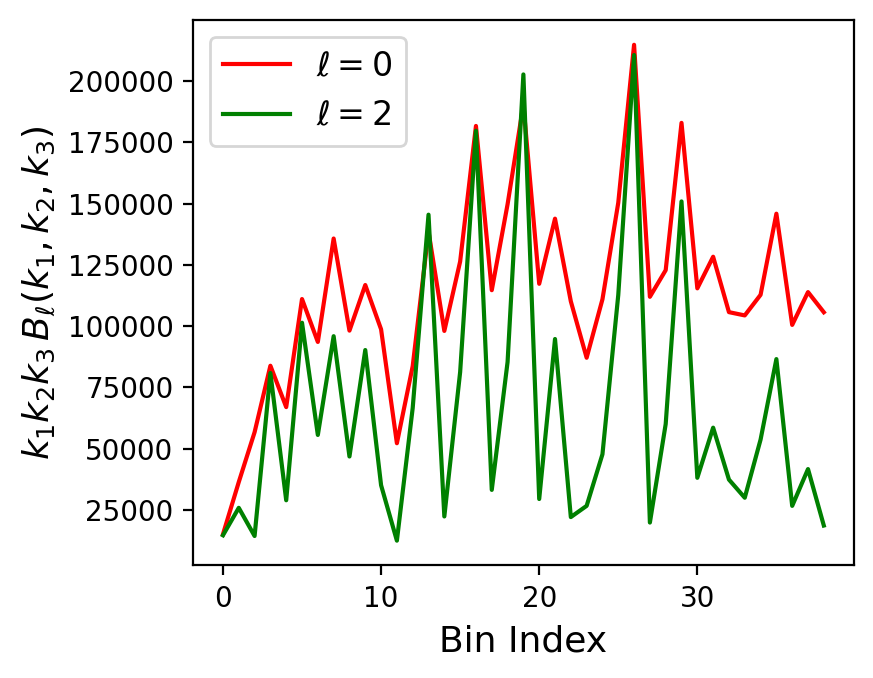

In [3]:
bk = bspec.Bk_ideal(discreteness_correction=False)

k123 = bspec.get_ks()
cs = ['r','g']
weight = k123.prod(axis=0)
fig, ax = plt.subplots(figsize=(4.5, 3.5))
for l in range(0, 3,2):
    ax.plot(weight*bk['b%d'%l],c=cs[l//2], ls='-', label=r'$\ell=%d$'%l)
ax.set_xlabel(r'Bin Index',fontsize=13)
ax.set_ylabel(r'$k_1k_2k_3\,B_\ell(k_1,k_2,k_3)$',fontsize=13)
ax.legend(fontsize=12)
plt.tight_layout()
plt.show()